# Importing Libraries

In [1]:
# importing necessary librarires
import pandas as pd
import numpy as np
import warnings
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Reading the csv file and getting the undersatanding of the data

In [2]:
# reading the csv file and seeing the top 5 rows to nderstand the data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# getting the info of dataframe like column type, content, null value etc..
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- all columns are either integer or float except dteday column which is date type
- some categorical column also marked as integer -> need to check

In [4]:
# knowing the shape of dataframe -> rows & column of dataframe
bike.shape

(730, 16)

- row : 730
- columns : 16

In [5]:
# getting the statistical summary of dataframe -> min, max, 50%, mean etc.
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking null percentage of each column
null = bike.isnull().sum() / bike.shape[0] * 100
null

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- no null values in any column

# Cleaning the dataset

In [7]:
# dropping unnecessary column
bike = bike.drop(["dteday", "casual", "registered","instant"], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# changing mnth to categorical type
bike["mnth"] = bike["mnth"].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [9]:
# changing season variable to categorical variable
bike["season"] = bike["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
# changing weathersit to categorical
bike["weathersit"] = bike["weathersit"].map({1:'Clear', 2:'Mist/Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})

In [11]:
# changing week day to categorical variable
bike["weekday"] = bike["weekday"].map({1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 7:'sunday'})

In [12]:
# checking info again
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     626 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [13]:
# checking top 5 rows
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# converting all categorical variable into dummy variable
var = ["season", "mnth", "weekday", "weathersit"]
status = pd.get_dummies(bike[var], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# concatinating dummy df with bike df
bike = pd.concat([bike, status], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,spring,0,Jan,0,monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# getting info of dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      730 non-null    object 
 1   yr                          730 non-null    int64  
 2   mnth                        730 non-null    object 
 3   holiday                     730 non-null    int64  
 4   weekday                     626 non-null    object 
 5   workingday                  730 non-null    int64  
 6   weathersit                  730 non-null    object 
 7   temp                        730 non-null    float64
 8   atemp                       730 non-null    float64
 9   hum                         730 non-null    float64
 10  windspeed                   730 non-null    float64
 11  cnt                         730 non-null    int64  
 12  season_spring               730 non-null    uint8  
 13  season_summer               730 non

In [17]:
# dropping categorical column
bike.drop(var, axis=1, inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

# Visualising the data

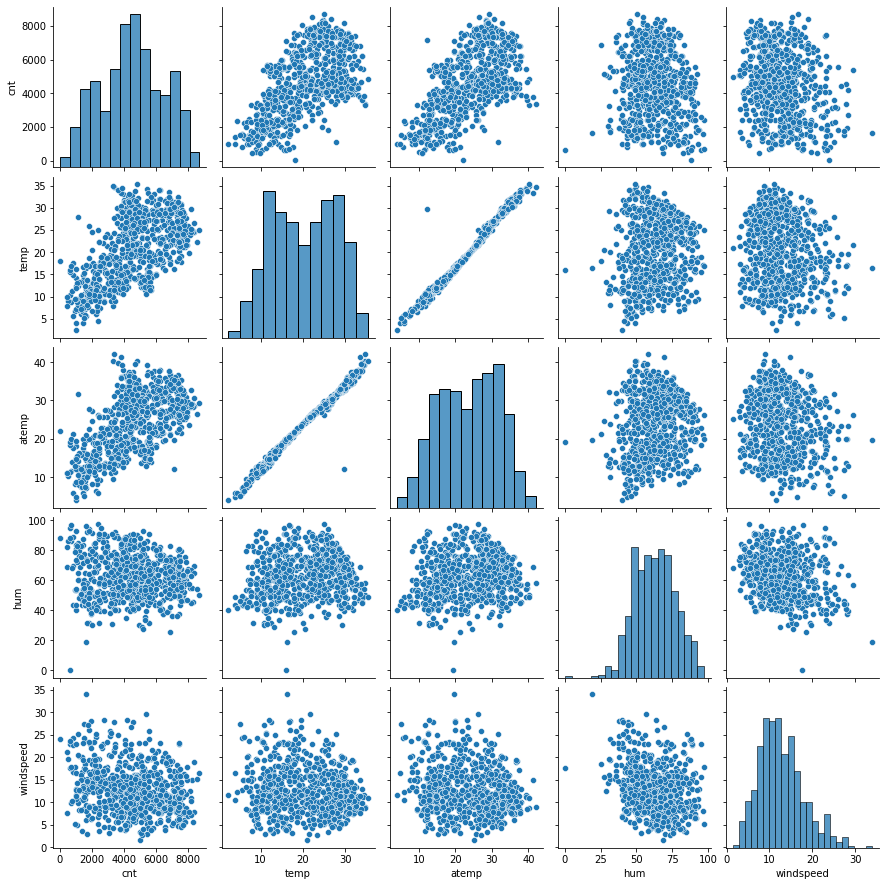

In [18]:
# numerical variable relationship
sns.pairplot(bike[['cnt','temp','atemp','hum','windspeed']])
plt.show()

- cnt is positively correlated with temp & atemp
- cnt is weakly correalted with windspeed & hum
- temp & atemp are highly correlated with themselves

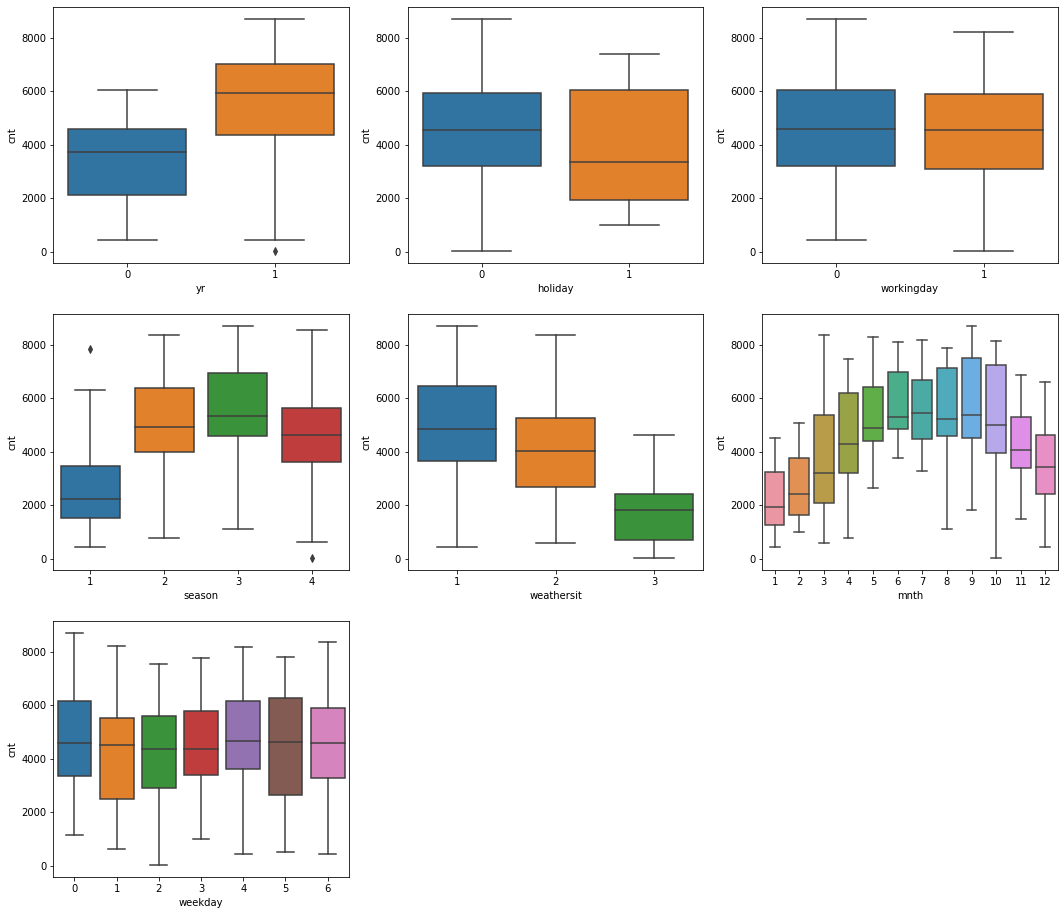

In [19]:
# categorical variable relationship
org = pd.read_csv("day.csv")
plt.figure(figsize=[18,16])
plt.subplot(3,3,1)
sns.boxplot(x='yr',y="cnt",data=org)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y="cnt",data=org)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y="cnt",data=org)
plt.subplot(3,3,4)
sns.boxplot(x='season',y="cnt",data=org)
plt.subplot(3,3,5)
sns.boxplot(x='weathersit',y="cnt",data=org)
plt.subplot(3,3,6)
sns.boxplot(x='mnth',y="cnt",data=org)
plt.subplot(3,3,7)
sns.boxplot(x='weekday',y="cnt",data=org)
plt.show()

- 2019 year has more bike booking than 2018
- more bike booking when no holiday
- more bike booking in working day
- season 3->2->4->1 bike booking
- weathersit 1->2->3 bike booking
- more bike booking in 5,6,7,8,9 mnth
- no much influence of weekday

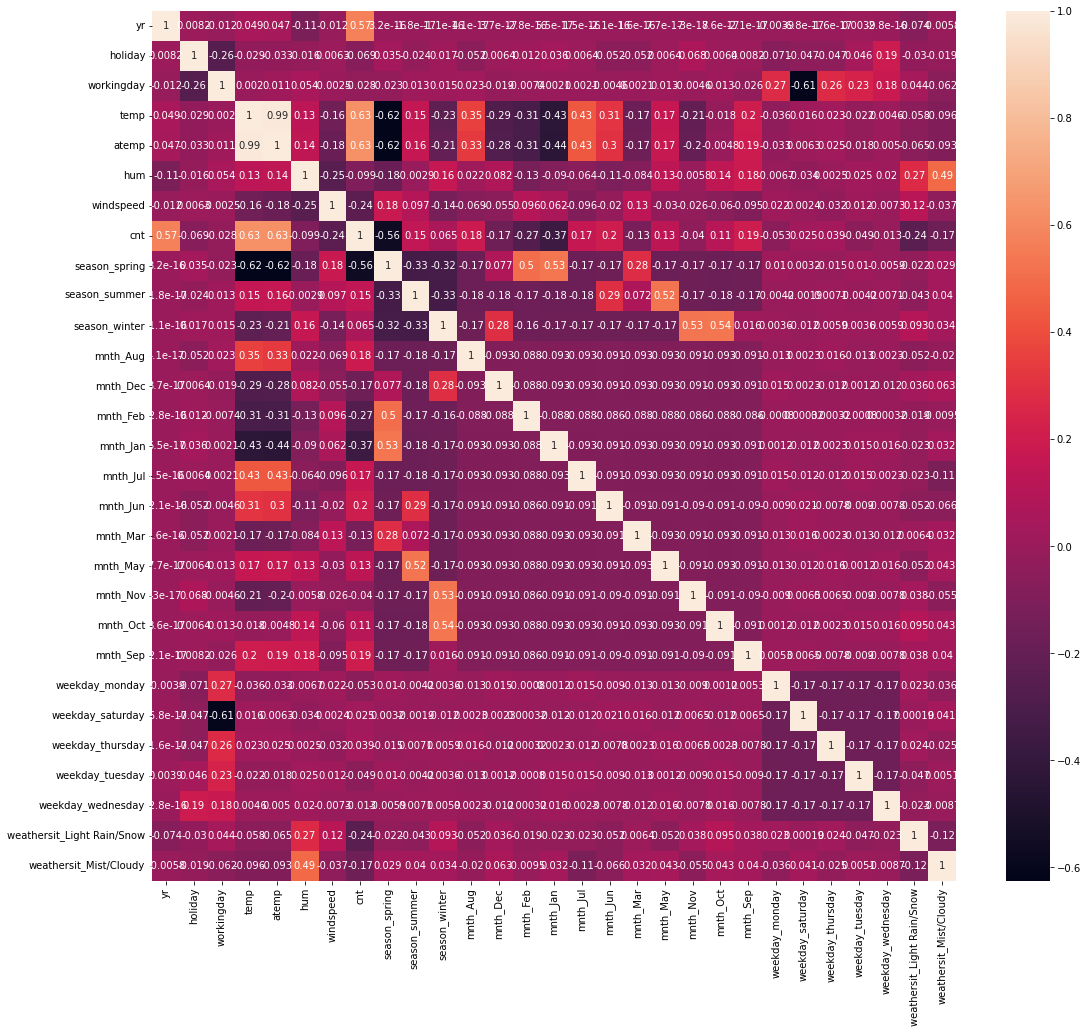

In [20]:
# correlation matrix
plt.figure(figsize=[18,16])
sns.heatmap(bike.corr(),annot=True)
plt.show()

- cnt is seems highly correlated with yr, temp & atemp
- most variable are intercorelated -> need to check VIF

In [21]:
# temp & atemp are highly correlated
bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test split

In [22]:
df_train,df_test = train_test_split(bike, train_size=.7, random_state=100)

In [23]:
df_train.shape

(510, 28)

In [24]:
df_test.shape

(220, 28)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   atemp                       510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   cnt                         510 non-null    int64  
 7   season_spring               510 non-null    uint8  
 8   season_summer               510 non-null    uint8  
 9   season_winter               510 non-null    uint8  
 10  mnth_Aug                    510 non-null    uint8  
 11  mnth_Dec                    510 non-null    uint8  
 12  mnth_Feb                    510 non-null    uint8  
 13  mnth_Jan                    510 n

# Rescaling

In [26]:
scaler = MinMaxScaler()
var=['atemp', 'hum', 'windspeed','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

In [27]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.086275,0.084314,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.281045,0.278131,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Model

In [29]:
y_train = df_train.pop("cnt")
X_train = df_train

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_monday', False, 6),
 ('weekday_saturday', False, 12),
 ('weekday_thursday', False, 11),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 7),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_monday', 'weekday_saturday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [34]:
X_train_rfe = X_train[col]

## Model 1

In [35]:
# VIFs checking
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.06
2,atemp,14.42
4,windspeed,3.90
6,season_winter,3.04
5,season_summer,2.29
14,weathersit_Mist/Cloudy,2.24
0,yr,2.06
10,mnth_Jan,1.92
11,mnth_Nov,1.87
8,mnth_Dec,1.64


In [36]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          2.92e-186
Time:                        00:30:38   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2931      0.032      9.260      0.000       0.231       0.355
yr                             0.2312      0.008     28.305      0.000       0.215       0.247
holiday                       -0.0837      0.026     -3.226      0.001      -0.135      -0.033
atemp                          0.4782      0.032     14.978      0.000       0.415       0.541
hum                           -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed                     -0.1771      0.026     -6.783      0.000      -0.228      -0.126
season_summer                  0.0793      0.013      6.295      0.000       0.055       0.104
season_winter                  0.1342      0.014      9.373      0.000       0.106       0.162
mnth_Aug                       0.0606      0.016      3.695      0.000       0.028       0.093
mnth_Dec                      -0.0486      0.019     -2.622      0.009      -0.085      -0.012
mnth_Feb                      -0.0497      0.021     -2.348      0.019      -0.091      -0.008
mnth_Jan                      -0.0762      0.021     -3.577      0.000      -0.118      -0.034
mnth_Nov                      -0.0417      0.019     -2.186      0.029      -0.079      -0.004
mnth_Sep                       0.1121      0.017      6.709      0.000       0.079       0.145
weathersit_Light Rain/Snow    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
weathersit_Mist/Cloudy        -0.0554      0.011     -5.240      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- dropping the variable 'hum' because of High VIF

In [37]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

## Model 2

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_winter,2.63
0,yr,2.06
4,season_summer,2.06
10,mnth_Nov,1.82
6,mnth_Aug,1.59
13,weathersit_Mist/Cloudy,1.57
7,mnth_Dec,1.41
11,mnth_Sep,1.35


In [39]:
X_train_lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          2.01e-183
Time:                        00:30:39   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2097      0.026      8.204      0.000       0.160       0.260
yr                             0.2351      0.008     28.454      0.000       0.219       0.251
holiday                       -0.0850      0.026     -3.220      0.001      -0.137      -0.033
atemp                          0.4446      0.032     14.106      0.000       0.383       0.507
windspeed                     -0.1491      0.026     -5.791      0.000      -0.200      -0.098
season_summer                  0.0738      0.013      5.785      0.000       0.049       0.099
season_winter                  0.1226      0.014      8.564      0.000       0.094       0.151
mnth_Aug                       0.0580      0.017      3.474      0.001       0.025       0.091
mnth_Dec                      -0.0567      0.019     -3.021      0.003      -0.094      -0.020
mnth_Feb                      -0.0558      0.021     -2.601      0.010      -0.098      -0.014
mnth_Jan                      -0.0868      0.022     -4.034      0.000      -0.129      -0.045
mnth_Nov                      -0.0418      0.019     -2.153      0.032      -0.080      -0.004
mnth_Sep                       0.1048      0.017      6.194      0.000       0.072       0.138
weathersit_Light Rain/Snow    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
weathersit_Mist/Cloudy        -0.0814      0.009     -9.218      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- dropping the variable 'mnth_Nov' because of High p value

## Model 3

In [40]:
X_train_new = X_train_new.drop(["mnth_Nov"], axis = 1)
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.96
3,windspeed,3.76
0,yr,2.06
4,season_summer,2.05
5,season_winter,1.79
6,mnth_Aug,1.59
12,weathersit_Mist/Cloudy,1.57
10,mnth_Sep,1.33
9,mnth_Jan,1.28
8,mnth_Feb,1.26


In [42]:
X_train_lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          1.42e-183
Time:                        00:30:40   Log-Likelihood:                 496.21
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1958      0.025      7.888      0.000       0.147       0.245
yr                             0.2350      0.008     28.337      0.000       0.219       0.251
holiday                       -0.0919      0.026     -3.494      0.001      -0.144      -0.040
atemp                          0.4618      0.031     15.087      0.000       0.402       0.522
windspeed                     -0.1484      0.026     -5.745      0.000      -0.199      -0.098
season_summer                  0.0776      0.013      6.118      0.000       0.053       0.103
season_winter                  0.1096      0.013      8.410      0.000       0.084       0.135
mnth_Aug                       0.0587      0.017      3.505      0.000       0.026       0.092
mnth_Dec                      -0.0397      0.017     -2.325      0.020      -0.073      -0.006
mnth_Feb                      -0.0468      0.021     -2.215      0.027      -0.088      -0.005
mnth_Jan                      -0.0766      0.021     -3.635      0.000      -0.118      -0.035
mnth_Sep                       0.1099      0.017      6.540      0.000       0.077       0.143
weathersit_Light Rain/Snow    -0.2821      0.025    -11.299      0.000      -0.331      -0.233
weathersit_Mist/Cloudy        -0.0808      0.009     -9.114      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       60.562   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.803
Skew:                          -0.628   Prob(JB):                     5.94e-32
Kurtosis:                       5.279   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- dropping the variable 'mnth_Feb' of high p value

## Model 4

In [43]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Sep',
       'weathersit_Light Rain/Snow', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.95
3,windspeed,3.31
0,yr,2.04
4,season_summer,1.92
5,season_winter,1.71
6,mnth_Aug,1.56
11,weathersit_Mist/Cloudy,1.55
9,mnth_Sep,1.32
7,mnth_Dec,1.23
8,mnth_Jan,1.23


In [45]:
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          1.10e-183
Time:                        00:30:40   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1663      0.021      7.907      0.000       0.125       0.208
yr                             0.2343      0.008     28.166      0.000       0.218       0.251
holiday                       -0.0943      0.026     -3.572      0.000      -0.146      -0.042
atemp                          0.4940      0.027     18.275      0.000       0.441       0.547
windspeed                     -0.1463      0.026     -5.647      0.000      -0.197      -0.095
season_summer                  0.0887      0.012      7.574      0.000       0.066       0.112
season_winter                  0.1222      0.012     10.370      0.000       0.099       0.145
mnth_Aug                       0.0641      0.017      3.852      0.000       0.031       0.097
mnth_Dec                      -0.0298      0.017     -1.800      0.073      -0.062       0.003
mnth_Jan                      -0.0538      0.018     -2.915      0.004      -0.090      -0.018
mnth_Sep                       0.1153      0.017      6.910      0.000       0.083       0.148
weathersit_Light Rain/Snow    -0.2807      0.025    -11.202      0.000      -0.330      -0.231
weathersit_Mist/Cloudy        -0.0811      0.009     -9.114      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       54.527   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.481
Skew:                          -0.567   Prob(JB):                     7.65e-29
Kurtosis:                       5.193   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- dropping the variable 'mnth_Dec' because of high p value

## Model 5

In [46]:
X_train_new = X_train_new.drop(["mnth_Dec"], axis = 1)
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.95
3,windspeed,3.27
0,yr,2.04
4,season_summer,1.91
5,season_winter,1.56
6,mnth_Aug,1.56
10,weathersit_Mist/Cloudy,1.54
8,mnth_Sep,1.31
7,mnth_Jan,1.22
9,weathersit_Light Rain/Snow,1.08


In [48]:
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          3.60e-184
Time:                        00:30:41   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1546      0.020      7.713      0.000       0.115       0.194
yr                             0.2344      0.008     28.112      0.000       0.218       0.251
holiday                       -0.0926      0.026     -3.503      0.001      -0.145      -0.041
atemp                          0.5067      0.026     19.374      0.000       0.455       0.558
windspeed                     -0.1410      0.026     -5.465      0.000      -0.192      -0.090
season_summer                  0.0913      0.012      7.840      0.000       0.068       0.114
season_winter                  0.1193      0.012     10.197      0.000       0.096       0.142
mnth_Aug                       0.0649      0.017      3.893      0.000       0.032       0.098
mnth_Jan                      -0.0465      0.018     -2.577      0.010      -0.082      -0.011
mnth_Sep                       0.1177      0.017      7.061      0.000       0.085       0.151
weathersit_Light Rain/Snow    -0.2781      0.025    -11.092      0.000      -0.327      -0.229
weathersit_Mist/Cloudy        -0.0811      0.009     -9.095      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.082
Skew:                          -0.544   Prob(JB):                     3.09e-27
Kurtosis:                       5.136   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- dropping the variable 'mnth_Jan' because of high p-value

## Model 6

In [49]:
X_train_new = X_train_new.drop(["mnth_Jan"], axis = 1)
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.92
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.83
6,mnth_Aug,1.55
5,season_winter,1.50
9,weathersit_Mist/Cloudy,1.49
7,mnth_Sep,1.30
8,weathersit_Light Rain/Snow,1.08
1,holiday,1.04


In [51]:
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train, X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          6.05e-184
Time:                        00:30:41   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1275      0.017      7.429      0.000       0.094       0.161
yr                             0.2334      0.008     27.867      0.000       0.217       0.250
holiday                       -0.0934      0.027     -3.513      0.000      -0.146      -0.041
atemp                          0.5370      0.024     22.850      0.000       0.491       0.583
windspeed                     -0.1319      0.026     -5.132      0.000      -0.182      -0.081
season_summer                  0.0990      0.011      8.750      0.000       0.077       0.121
season_winter                  0.1311      0.011     12.114      0.000       0.110       0.152
mnth_Aug                       0.0679      0.017      4.065      0.000       0.035       0.101
mnth_Sep                       0.1209      0.017      7.226      0.000       0.088       0.154
weathersit_Light Rain/Snow    -0.2760      0.025    -10.953      0.000      -0.326      -0.227
weathersit_Mist/Cloudy        -0.0822      0.009     -9.184      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       51.460   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.152
Skew:                          -0.530   Prob(JB):                     1.10e-27
Kurtosis:                       5.172   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- all the variable have less VIF & approx 0 p-value
- means they all are significant & non multicollinear and we can rely on the model lm6

In [52]:
lm6.params

const                         0.127500
yr                            0.233436
holiday                      -0.093374
atemp                         0.536994
windspeed                    -0.131917
season_summer                 0.098988
season_winter                 0.131127
mnth_Aug                      0.067940
mnth_Sep                      0.120851
weathersit_Light Rain/Snow   -0.276020
weathersit_Mist/Cloudy       -0.082231
dtype: float64

## Equation of hyperplane

#### cnt = 0.127500 + (yr * 0.233436) - (holiday * 0.093374) + (atemp * 0.536994) - (windspeed * 0.131917)
####          + (season_summer * 0.098988) + (season_winter * 0.131127) + (mnth_Sep * 0.120851) + (mnth_Aug * 0.067940)
####           - (weathersit_Light Rain/Snow * .276020) - (weathersit_Mist/Cloudy * 0.082231)

## Residual Analysis, Prediction & Evaluation

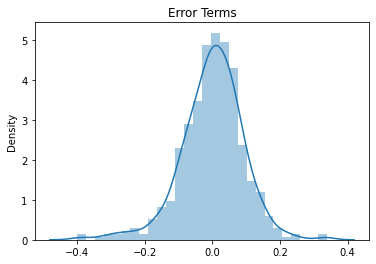

In [53]:
y_train_pred = lm6.predict(X_train_lm6)
res = y_train - y_train_pred
sns.distplot(res)
plt.title("Error Terms")
plt.show()

- Error terms are normally distributed hence assumption statisfied

In [54]:
# PREDICTION
var = ['atemp', 'hum', 'windspeed','cnt']
df_test[var] = scaler.transform(df_test[var])

In [55]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,1,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.086364,0.118182,0.172727,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.281541,0.323559,0.378873,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test.pop("cnt")
X_test = df_test

In [58]:
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Sep', 'weathersit_Light Rain/Snow',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [59]:
col = X_train_new.columns
X_test = X_test[col]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       220 non-null    float64
 1   yr                          220 non-null    int64  
 2   holiday                     220 non-null    int64  
 3   atemp                       220 non-null    float64
 4   windspeed                   220 non-null    float64
 5   season_summer               220 non-null    uint8  
 6   season_winter               220 non-null    uint8  
 7   mnth_Aug                    220 non-null    uint8  
 8   mnth_Sep                    220 non-null    uint8  
 9   weathersit_Light Rain/Snow  220 non-null    uint8  
 10  weathersit_Mist/Cloudy      220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [60]:
X_test_lm6.shape

(220, 11)

In [61]:
y_test_pred = lm6.predict(X_test_lm6)

In [62]:
r2_score(y_test, y_test_pred)

0.79425209298371

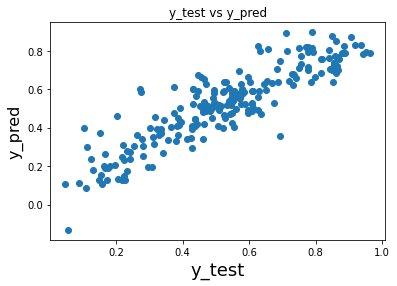

In [63]:
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred')               
plt.xlabel('y_test', fontsize=18)      
plt.ylabel('y_pred', fontsize=16)
plt.show()